In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset = pd.read_csv("data/motionStrike_TVcodes_data.tsv", delimiter = '\t')
dataset

,CaseReferenceNumber,MotionID,CaseLocation,CaseMajorCode,CaseMinorCode,CaseTrialListType,CaseMarkingCode,CaseDispositionJudgeJurisNo,CaseDispositionDocketLegendCode,MotionResultCode,...,MotionJurisNumber,MotionDocumentPriorityCode,CaseAttorneyJuris,CaseAttorneyType,MotionTimeDuration,MotionDocumentTypeName,SelfRepBeforeMotionFileCount,SelfRepBeforeMotionDecidedCount,SelfRepBeforeMotionFileBool,SelfRepBeforeMotionDecidedBool
0,207,1751,FBT,V,1,9,16.0,416586.0,JDGDACT,GR,...,418027.0,30,418027.0,J,78.0,MOTION TO STRIKE,1,1,True,True
1,1472,10915,FBT,V,1,9,16.0,NaN,WDACT,DN,...,416586.0,30,416586.0,R,22.0,MOTION TO STRIKE,0,0,False,False
2,1494,11050,NNI,V,1,9,16.0,NaN,WDACT,GR,...,422392.0,30,422392.0,J,285.0,MOTION TO STRIKE,0,0,False,False
3,371,2708,LLI,T,90,-1,NaN,418028.0,SJD,OR,...,418028.0,30,418028.0,R,120.0,MOTION TO STRIKE,0,0,False,False
4,1422,10373,HHD,T,2,-1,NaN,422394.0,SJ,GR,...,81181.0,30,81181.0,R,153.0,MOTION TO STRIKE,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13798,4137836,26395795,HHD,T,20,-1,NaN,NaN,NaN,OR,...,415596.0,30,415596.0,R,47.0,MOTION TO STRIKE,0,0,False,False
13799,4143717,26397468,HHB,T,61,-1,NaN,NaN,NaN,DN,...,431662.0,30,431662.0,J,49.0,MOTION TO STRIKE,0,0,False,False
13800,4111125,26482434,TTD,T,29,-1,NaN,NaN,NaN,GR,...,436946.0,30,436946.0,J,47.0,MOTION TO STRIKE,1,2,True,True
13801,4026253,26397700,FBT,T,90,-1,NaN,NaN,NaN,GR,...,438581.0,30,438581.0,J,47.0,MOTION TO STRIKE,0,0,False,False


In [3]:
#important columns identifiers 
target= dataset["MotionResultCode"]
#potential features
features = dataset[["CaseMajorCode", "MotionTimeDuration", "CaseLocation", "CaseAttorneyJuris"]]
features

,CaseMajorCode,MotionTimeDuration,CaseLocation,CaseAttorneyJuris
0,V,78.0,FBT,418027.0
1,V,22.0,FBT,416586.0
2,V,285.0,NNI,422392.0
3,T,120.0,LLI,418028.0
4,T,153.0,HHD,81181.0
...,...,...,...,...
13798,T,47.0,HHD,415596.0
13799,T,49.0,HHB,431662.0
13800,T,47.0,TTD,436946.0
13801,T,47.0,FBT,438581.0


In [4]:
target

0        GR
1        DN
2        GR
3        OR
4        GR
         ..
13798    OR
13799    DN
13800    GR
13801    GR
13802    WD
Name: MotionResultCode, Length: 13803, dtype: object

In [5]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [6]:

toEncode = ['CaseMajorCode', 'CaseLocation', 'CaseAttorneyJuris']
for i in toEncode:
    le = LabelEncoder()
    features[i] = le.fit_transform(features[i])

features

/tmp/ipykernel_99418/2906387462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[i] = le.fit_transform(features[i])
/tmp/ipykernel_99418/2906387462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[i] = le.fit_transform(features[i])
/tmp/ipykernel_99418/2906387462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,CaseMajorCode,MotionTimeDuration,CaseLocation,CaseAttorneyJuris
0,1,78.0,2,195
1,1,22.0,2,186
2,1,285.0,11,236
3,0,120.0,8,196
4,0,153.0,5,72
...,...,...,...,...
13798,0,47.0,5,180
13799,0,49.0,4,283
13800,0,47.0,12,305
13801,0,47.0,2,315


In [7]:
#filter out nans

features = features.dropna()
features

,CaseMajorCode,MotionTimeDuration,CaseLocation,CaseAttorneyJuris
0,1,78.0,2,195
1,1,22.0,2,186
2,1,285.0,11,236
3,0,120.0,8,196
4,0,153.0,5,72
...,...,...,...,...
13798,0,47.0,5,180
13799,0,49.0,4,283
13800,0,47.0,12,305
13801,0,47.0,2,315


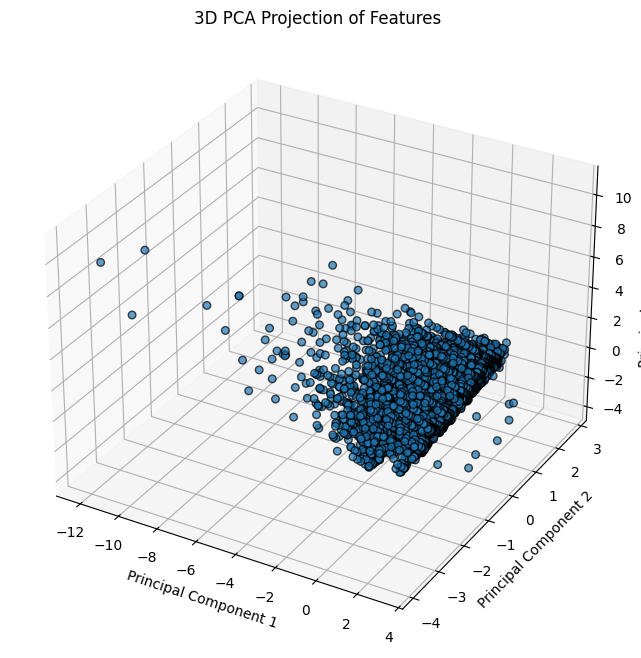

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


scaler = StandardScaler()
feature_scaled = scaler.fit_transform(features)

pca = PCA(n_components=3)
feature_pca = pca.fit_transform(feature_scaled)


x = feature_pca[:, 0]
y = feature_pca[:, 1]
z = feature_pca[:, 2]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=30, edgecolor='k', alpha=0.7)

ax.set_title('3D PCA Projection of Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

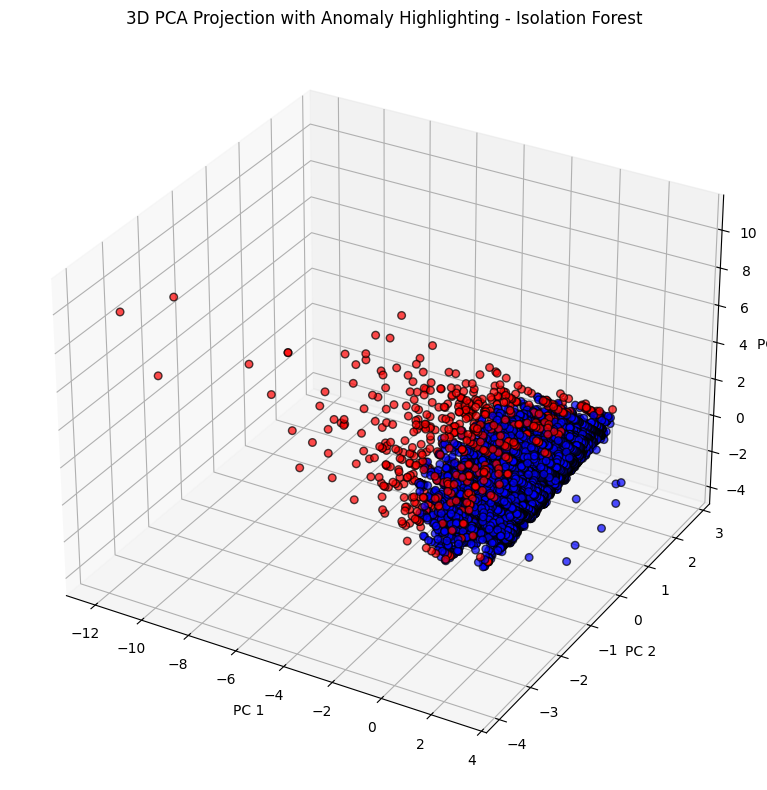

In [9]:
#isolation forest implementation
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination= 0.05, n_estimators= 100, n_jobs=-1)
flagged = clf.fit_predict(feature_scaled)


x = feature_pca[:, 0]
y = feature_pca[:, 1]
point_colors = ['blue' if lab==1 else 'red' for lab in flagged]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # ← enables 3D projection

from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
feature_pca3 = pca3.fit_transform(feature_scaled)

# 2) Unpack into x, y, z
x3 = feature_pca3[:, 0]
y3 = feature_pca3[:, 1]
z3 = feature_pca3[:, 2]

# 3) Map isolation‑forest flags to colors
# flagged: array of 1 (inlier) or -1 (anomaly)
colors = ['blue' if lab == 1 else 'red' for lab in flagged]

# 4) Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x3, y3, z3,
           c=colors,
           s=30,
           edgecolor='k',
           alpha=0.7)

ax.set_title('3D PCA Projection with Anomaly Highlighting - Isolation Forest')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.tight_layout()
plt.show()


In [10]:
import plotly.express as px


labels = ['Inlier' if lab == 1 else 'Anomaly' for lab in flagged]
color_map = {'Inlier': 'blue', 'Anomaly': 'red'}

# Interactive 3D scatter plot
fig = px.scatter_3d(
    x=feature_pca3[:, 0],
    y=feature_pca3[:, 1],
    z=feature_pca3[:, 2],
    color=labels,
    color_discrete_map=color_map,
    title='3D PCA Projection with Anomaly Highlighting - Interactive Isolation Forest',
    labels={'x': 'PC 1', 'y': 'PC 2', 'z': 'PC 3'}
)
fig.update_traces(marker=dict(size=4, line=dict(width=0.5, color='DarkSlateGrey')))
fig.show()

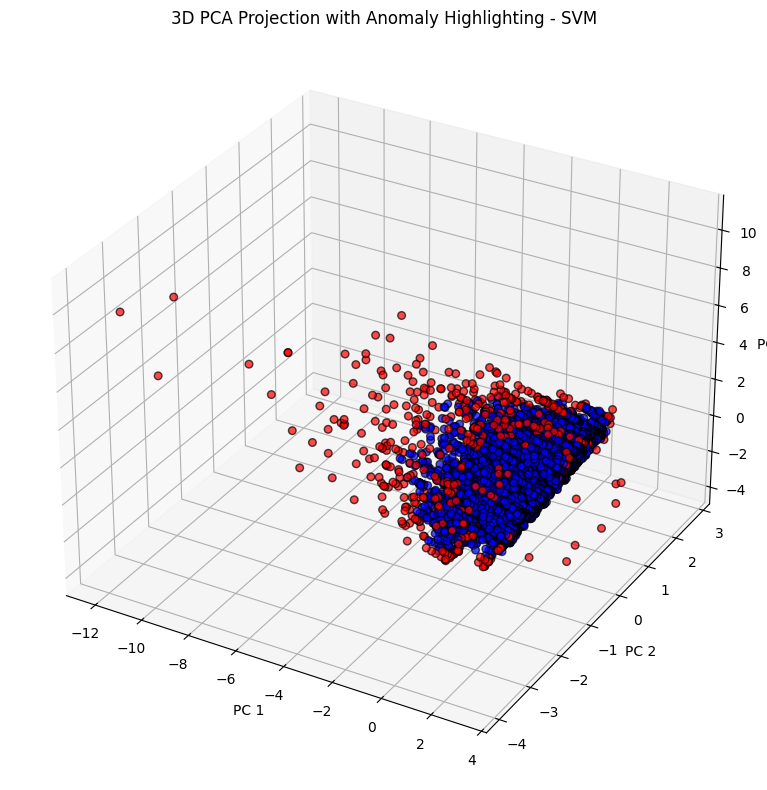

In [11]:
#one class SVM implementation
from sklearn.svm import OneClassSVM

svm = OneClassSVM(nu=0.05)
flagged1 =svm.fit_predict(feature_scaled)

colors = ['blue' if lab == 1 else 'red' for lab in flagged1]

from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
feature_pca3 = pca3.fit_transform(feature_scaled)

# 2) Unpack into x, y, z
x3 = feature_pca3[:, 0]
y3 = feature_pca3[:, 1]
z3 = feature_pca3[:, 2]



# 4) Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x3, y3, z3,
           c=colors,
           s=30,
           edgecolor='k',
           alpha=0.7)

ax.set_title('3D PCA Projection with Anomaly Highlighting - SVM')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.tight_layout()
plt.show()

In [12]:
labels = ['Inlier' if lab == 1 else 'Anomaly' for lab in flagged1]
color_map = {'Inlier': 'blue', 'Anomaly': 'red'}

# Interactive 3D scatter plot
fig = px.scatter_3d(
    x=feature_pca3[:, 0],
    y=feature_pca3[:, 1],
    z=feature_pca3[:, 2],
    color=labels,
    color_discrete_map=color_map,
    title='3D PCA Projection with Anomaly Highlighting - Interactive One Class SVM',
    labels={'x': 'PC 1', 'y': 'PC 2', 'z': 'PC 3'}
)
fig.update_traces(marker=dict(size=4, line=dict(width=0.5, color='DarkSlateGrey')))
fig.show()

In [ ]:
#experimental autoencoder
"""
The plan is to utilize an autoencoder for anomaly detection,

We will encode and decode our features and the data that exceeds the reconstruction error
bounds will be flagged as anomalies 

"""

"""
Steps:
train normal looking data
give new data 


sub autoencoders

figure it out what data to encode


Create the autoencoder network
Train the autoencoder network
Compute and store the Reconstruction error scores
set a reconstruction error threshold
highlight that threshold on the PCA graph 
"""


In [ ]:
#autoencoder network
"""
The auto encoder needs implementation 
"""

In [ ]:

#DB Scan clustering